# Final Project Submission

Please fill out:
* Student name: Cindy King'ori
* Student pace: Part time
* Scheduled project review date/time: 24/07/2023
* Instructor name: Ms. Stella Waithera & Ms Everlyn Asiko
* Blog post URL:


## Important Factors to Evaluate When Entering the Film Industry - A Microsoft Perspective

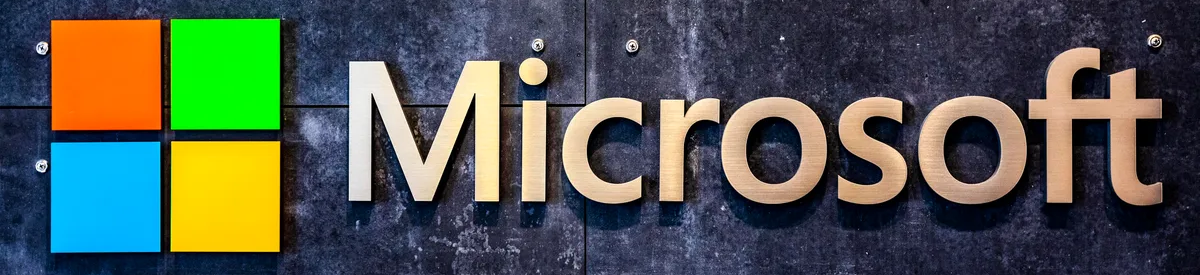

## Overview

This examination centers on the strategies a company could adopt to enter the film-making realm and the specific sectors within the industry to emphasize. The assessment identifies favorable opportunities that carry minimal risk, especially regarding the preferred genres to concentrate on.

# Business Problem

Microsoft Corp. has decided to create original content therefore have decided to create a new movie studio. They have no prior knowledge on how to start.

# 1. Data Importation

Below we Import all the necessary libraries for use.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [2]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
merged_data.csv
student.ipynb
zippedData


Below is a list of data provided for exploration. Sources are from IMDB, Box Office Mojo, Rotten Tomatoes, The MovieDB and The Numbers. They provide information on the ratings, best movies, best performing genres, production budgets, gross revenues received after movie release, release dates,cast and crew information to just mention a few.

In [3]:
!ls zippeddata

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


Read all the files provided to ascertain which dataset would be most suitable for the exploratory data analysis (EDA) journey.

In [4]:
df_moviegross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_moviegross.info()
df_moviegross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget.info()
movie_budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
name_basics.info()
name_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [7]:
akas_title = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
akas_title.info()
akas_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [8]:
basics_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
basics_title.info()
basics_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
crew_title = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
crew_title.info()
crew_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [10]:
principlas_title = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
principlas_title.info()
principlas_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [11]:
ratings_title = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
ratings_title.info()
ratings_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
file_path = "zippedData/rt.movie_info.tsv.gz"

list_movie_info = pd.read_csv(file_path, sep='\t', compression='infer')

print(list_movie_info.head())
print(list_movie_info.info())

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

In [14]:
file_path2 = "zippedData/rt.reviews.tsv.gz"

# Try reading the file with 'utf-8', if it fails, try 'latin-1'
try:
    total_reviews = pd.read_csv(file_path2, sep='\t', compression='infer', encoding='utf-8')
except UnicodeDecodeError:
    total_reviews = pd.read_csv(file_path2, sep='\t', compression='infer', encoding='latin-1')

print(total_reviews.head())
print(total_reviews.info())

   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null C

Based on the information provided earlier, the most appropriate datasets for utilization in this specific phase include:
1. df_moviegross
2. movie_budget
3. basics_title
4. ratings_title
5. movies_df

These datasets have been selected because they encompass valuable information that would be beneficial during the initial decision-making stage. They would address the following inquiries:
1. What are the primary patterns and opportunities within the film industry?
2. Are there any niche markets or underserved audience segments that are worth exploring?
3. How much funding is required to cover movie production and operational expenses?
4. What is the potential revenue from movie releases and other income streams?
5. What are the projected returns on investment, and what is the expected payback period?
6. What genres, budget ranges, and target audiences does the studio plan to focus on for movie production?

# 2. Data Cleaning & Preparation
Here, we perform data cleaning to retain complete and reliable information that can produce optimal outcomes. Cleaning here means fixing wrong data. The data may have empty cells, data may be in the wrong format or the data may contain duplicates therefore would need deletion, filling in, reformating to ensure it is in the best shape for use.

As a start, we begin by investigating whether the data has any missing values, then dropping them followed by removing the duplicate rows then changing the data types to useable formats.

# 2.1. Movie gross

In [15]:
df_moviegross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace = True)
df_moviegross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [16]:
df_moviegross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3275    False
3286    False
3309    False
3342    False
3353    False
Length: 2007, dtype: bool

The remaining cells all have data filled, no duplicate cells and no empty cells. The next step is to change the cell type of the column foreign_gross into and integer from object.

In [17]:
df_moviegross['foreign_gross'] = df_moviegross['foreign_gross'].str.replace(',', '').astype(float)
df_moviegross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


# 2.2.Title basics

In [18]:
basics_title.info()
basics_title.dropna(subset=['original_title', 'runtime_minutes', 'genres'], inplace = True)
basics_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres  

In [19]:
basics_title.duplicated()

0         False
1         False
2         False
4         False
5         False
          ...  
146134    False
146135    False
146136    False
146137    False
146139    False
Length: 112232, dtype: bool

The remaining cells all have data filled, no duplicate cells and data is in the correct format.

# 2.3.Title ratings
From ratings_title.info(), it is evdient that there are no missing values, we therefore proceed to look for duplicated values.

In [20]:
ratings_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [21]:
ratings_title.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

From the results above, the data does not contain any duplicated values.

# 2.4.Movies
From movies_df() under 'Data Importation', it is evident that the data file has no empty cells. We proceed to look for duplicate values as well as converting the release_date column type into a datetime format.

In [22]:
movies_df.duplicated()
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


# 2.5.Movie budget
From movie_budget.info() under 'Data Importation', it is evident that the data file has no empty cells. We proceed to check for duplicate values and change the type of values of the columns release_data, production_budget, domestic_gross and worldwide_gross from object values to date/time and float values respectively.

In [23]:
movie_budget.duplicated()
movie_budget['release_date'] =  pd.to_datetime(movie_budget['release_date'])
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


# 3. Data Analysis & Visualization

Data analysis and visualization encompasses the use of statistical information derived from the data such as the measures of central tendency, dispersion or variation. We then visualise the values using Matplotlib or Seaborn libraries. The visualisations maybe bar graphs, pie charts, histograms, frequency tables, heat maps, scatter plots just to mention a few.

 As a start, merge the movies_budget table with the basics_title to get the genre with the highest production budget.

In [24]:
budget_basics_df = pd.concat([movie_budget, basics_title], axis = 1)
budget_basics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1.0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama"
1,2.0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama"
2,3.0,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama
3,4.0,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
146134,NaN,NaT,NaN,NaN,NaN,NaN,tt9916160,Drømmeland,Drømmeland,2019.0,72.0,Documentary
146135,NaN,NaT,NaN,NaN,NaN,NaN,tt9916170,The Rehearsal,O Ensaio,2019.0,51.0,Drama
146136,NaN,NaT,NaN,NaN,NaN,NaN,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017.0,84.0,Documentary
146137,NaN,NaT,NaN,NaN,NaN,NaN,tt9916190,Safeguard,Safeguard,2019.0,90.0,"Drama,Thriller"


# 3.1. Average amount need for production

In [25]:
#The code below ensures the values are readable. It adds commas where necessary.
pd.options.display.float_format = '{:,.2f}'.format
budget_basics_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,"5,782.00","5,782.00","5,782.00","5,782.00","112,232.00","112,232.00"
mean,50.37,"31,587,757.10","41,873,326.87","91,487,460.91","2,014.40",86.26
std,28.82,"41,812,076.83","68,240,597.36","174,719,968.78",2.64,167.90
min,1.00,"1,100.00",0.00,0.00,"2,010.00",1.00
25%,25.00,"5,000,000.00","1,429,534.50","4,125,414.75","2,012.00",70.00
50%,50.00,"17,000,000.00","17,225,945.00","27,984,448.50","2,014.00",87.00
75%,75.00,"40,000,000.00","52,348,661.50","97,645,836.50","2,017.00",99.00
max,100.00,"425,000,000.00","936,662,225.00","2,776,345,279.00","2,022.00","51,420.00"


In [26]:
budget_basics_df_described = budget_basics_df.describe()
budget_basics_df_described

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,"5,782.00","5,782.00","5,782.00","5,782.00","112,232.00","112,232.00"
mean,50.37,"31,587,757.10","41,873,326.87","91,487,460.91","2,014.40",86.26
std,28.82,"41,812,076.83","68,240,597.36","174,719,968.78",2.64,167.90
min,1.00,"1,100.00",0.00,0.00,"2,010.00",1.00
25%,25.00,"5,000,000.00","1,429,534.50","4,125,414.75","2,012.00",70.00
50%,50.00,"17,000,000.00","17,225,945.00","27,984,448.50","2,014.00",87.00
75%,75.00,"40,000,000.00","52,348,661.50","97,645,836.50","2,017.00",99.00
max,100.00,"425,000,000.00","936,662,225.00","2,776,345,279.00","2,022.00","51,420.00"


C:\Users\CindyKing'ori\AppData\Local\Temp\ipykernel_20048\1099672493.py:13: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_melted = pd.melt(df_budgets, id_vars='id', var_name='split_budget', value_name='worldwide_gross')


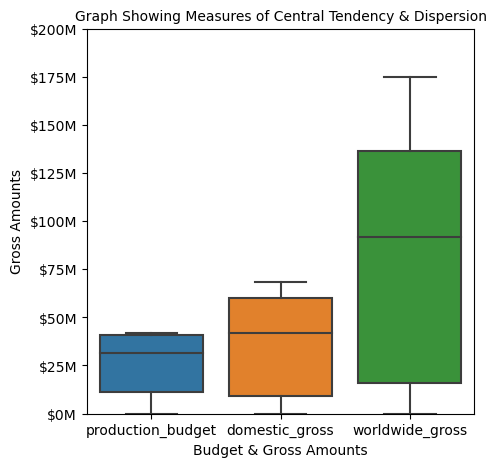

In [27]:
# Given data
data = {
    'id': [5_782.00, 28.82, 1.00, 25.00, 50.00, 75.00, 100.00],
    'production_budget': [31_587_757.10, 41_812_076.83, 1_100.00, 5_000_000.00, 17_000_000.00, 40_000_000.00, 425_000_000.00],
    'domestic_gross': [41_873_326.87, 68_240_597.36, 0.00, 1_429_534.50, 17_225_945.00, 52_348_661.50, 936_662_225.00],
    'worldwide_gross': [91_487_460.91, 174_719_968.78, 0.00, 4_125_414.75, 27_984_448.50, 97_645_836.50, 2_776_345_279.00],
}

# Create a DataFrame from the data
df_budgets = pd.DataFrame(data)

# Melt the DataFrame to reshape it for the box plot
df_melted = pd.melt(df_budgets, id_vars='id', var_name='split_budget', value_name='worldwide_gross')

# Create the box plot
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(x='split_budget', y='worldwide_gross', data=df_melted)
ax.set_xlabel('Budget & Gross Amounts', fontsize=10)
ax.set_ylabel('Gross Amounts', fontsize=10)
ax.set_title('Graph Showing Measures of Central Tendency & Dispersion', fontsize=10)
ax.set(ylim=[0, 200000000])

# Format y-axis labels using millions
cur_million = lambda x, p: '${:.0f}M'.format(x * 1e-6)
ax.yaxis.set_major_formatter(plt.FuncFormatter(cur_million))

plt.show()


# 3.2. Below is a graph showing the relationship between the production budget and domestic gross amount and worldwide gross amount

In [28]:
budget_basics_df.corr()

C:\Users\CindyKing'ori\AppData\Local\Temp\ipykernel_20048\3117011574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  budget_basics_df.corr()


,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
id,1.00,-0.04,0.01,-0.01,0.01,0.03
production_budget,-0.04,1.00,0.69,0.75,-0.33,0.16
domestic_gross,0.01,0.69,1.00,0.94,-0.22,0.09
worldwide_gross,-0.01,0.75,0.94,1.00,-0.26,0.11
start_year,0.01,-0.33,-0.22,-0.26,1.00,0.00
runtime_minutes,0.03,0.16,0.09,0.11,0.00,1.00


C:\Users\CindyKing'ori\AppData\Local\Temp\ipykernel_20048\4227480818.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ft_corr = features.corrwith(budget_basics_df['production_budget']).to_frame('Correlation')


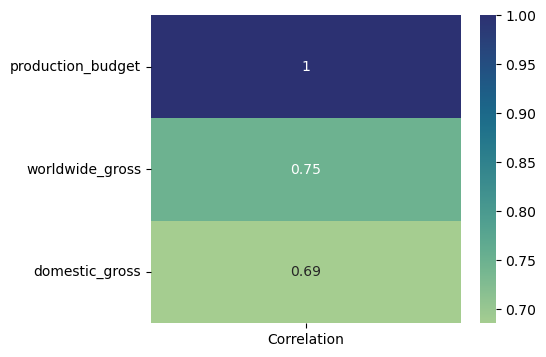

In [29]:
# Measuring how attributes in the DF are correlated to Gross profits
features = budget_basics_df.drop(columns=['id','start_year',
                                   'runtime_minutes'])
ft_corr = features.corrwith(budget_basics_df['production_budget']).to_frame('Correlation')
# Sorting values in descending order
ft_corr.sort_values('Correlation',ascending=False,inplace=True)
# Plotting the values to a heatmap
fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(ft_corr,cmap='crest',annot=True);

Correlation values typically range from -1 to 1. In this dataset, the correlation between production_budget and domestic_gross is 0.69, while the correlation between production_budget and worldwide_gross is 0.75. These values indicate a strong positive relationship between production_budget and both domestic_gross and worldwide_gross. This suggests that as the production_budget increases, there is a direct positive impact on the returns in both domestic and worldwide markets after the release of the movies.

# 3.3. Relationship between the production budget and genre

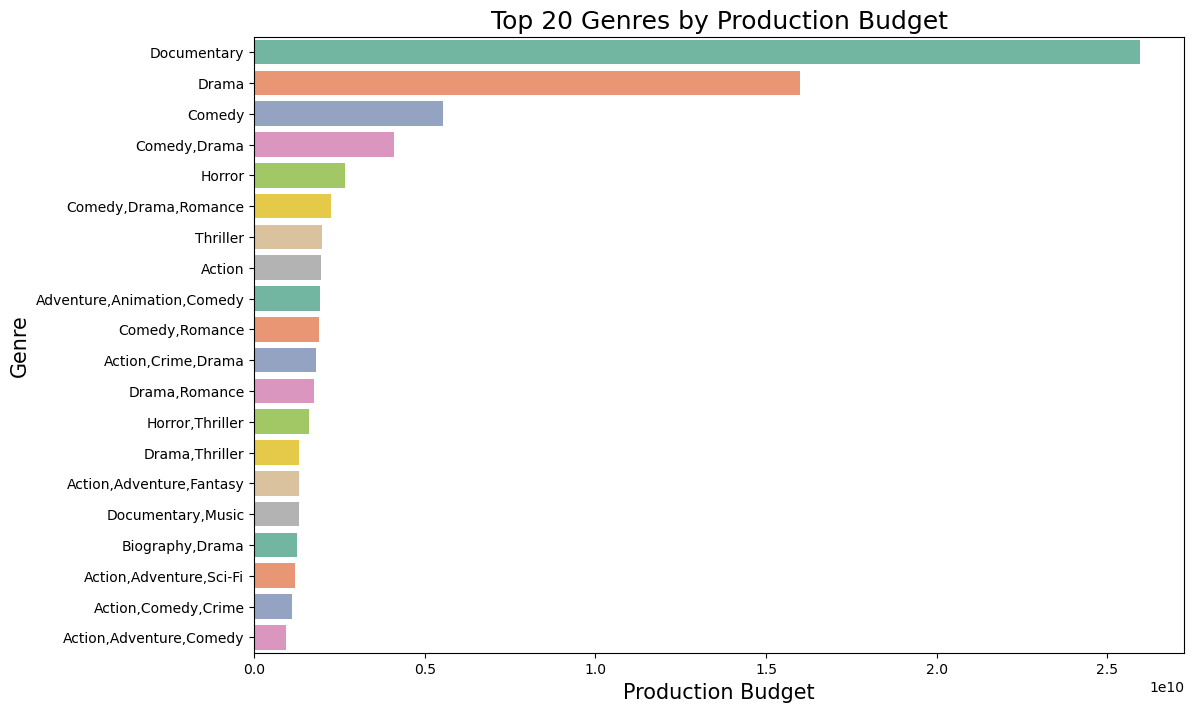

In [30]:
# Sample data for the bar graph (replace this with your actual data)
data = budget_basics_df.dropna(subset=['genres', 'production_budget'])

# Group data by 'genres' and calculate the total production budget for each genre
genre_budget = data.groupby('genres')['production_budget'].sum().reset_index()

# Sort genres based on total production budget in descending order
sorted_genres = genre_budget.sort_values(by='production_budget', ascending=False)

# Select the top 20 genres
top_20_genres = sorted_genres.head(20)

x_values = 'production_budget'
y_values = 'genres'

# Define a color palette for the top 20 genres
num_colors = len(top_20_genres)
color_palette = sns.color_palette("Set2", num_colors)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))

sns.barplot(x=x_values, y=y_values, data=top_20_genres, palette=color_palette)

plt.xlabel('Production Budget', fontsize=15)
plt.ylabel('Genre', fontsize=15)
plt.title('Top 20 Genres by Production Budget', fontsize=18)

plt.show()


The graph above shows that the top five genres with high production budgets are documentary, drama, comedy, comedy:drama and horror.

# 3.4. Relationship between domestic gross, worldwide gross and genre

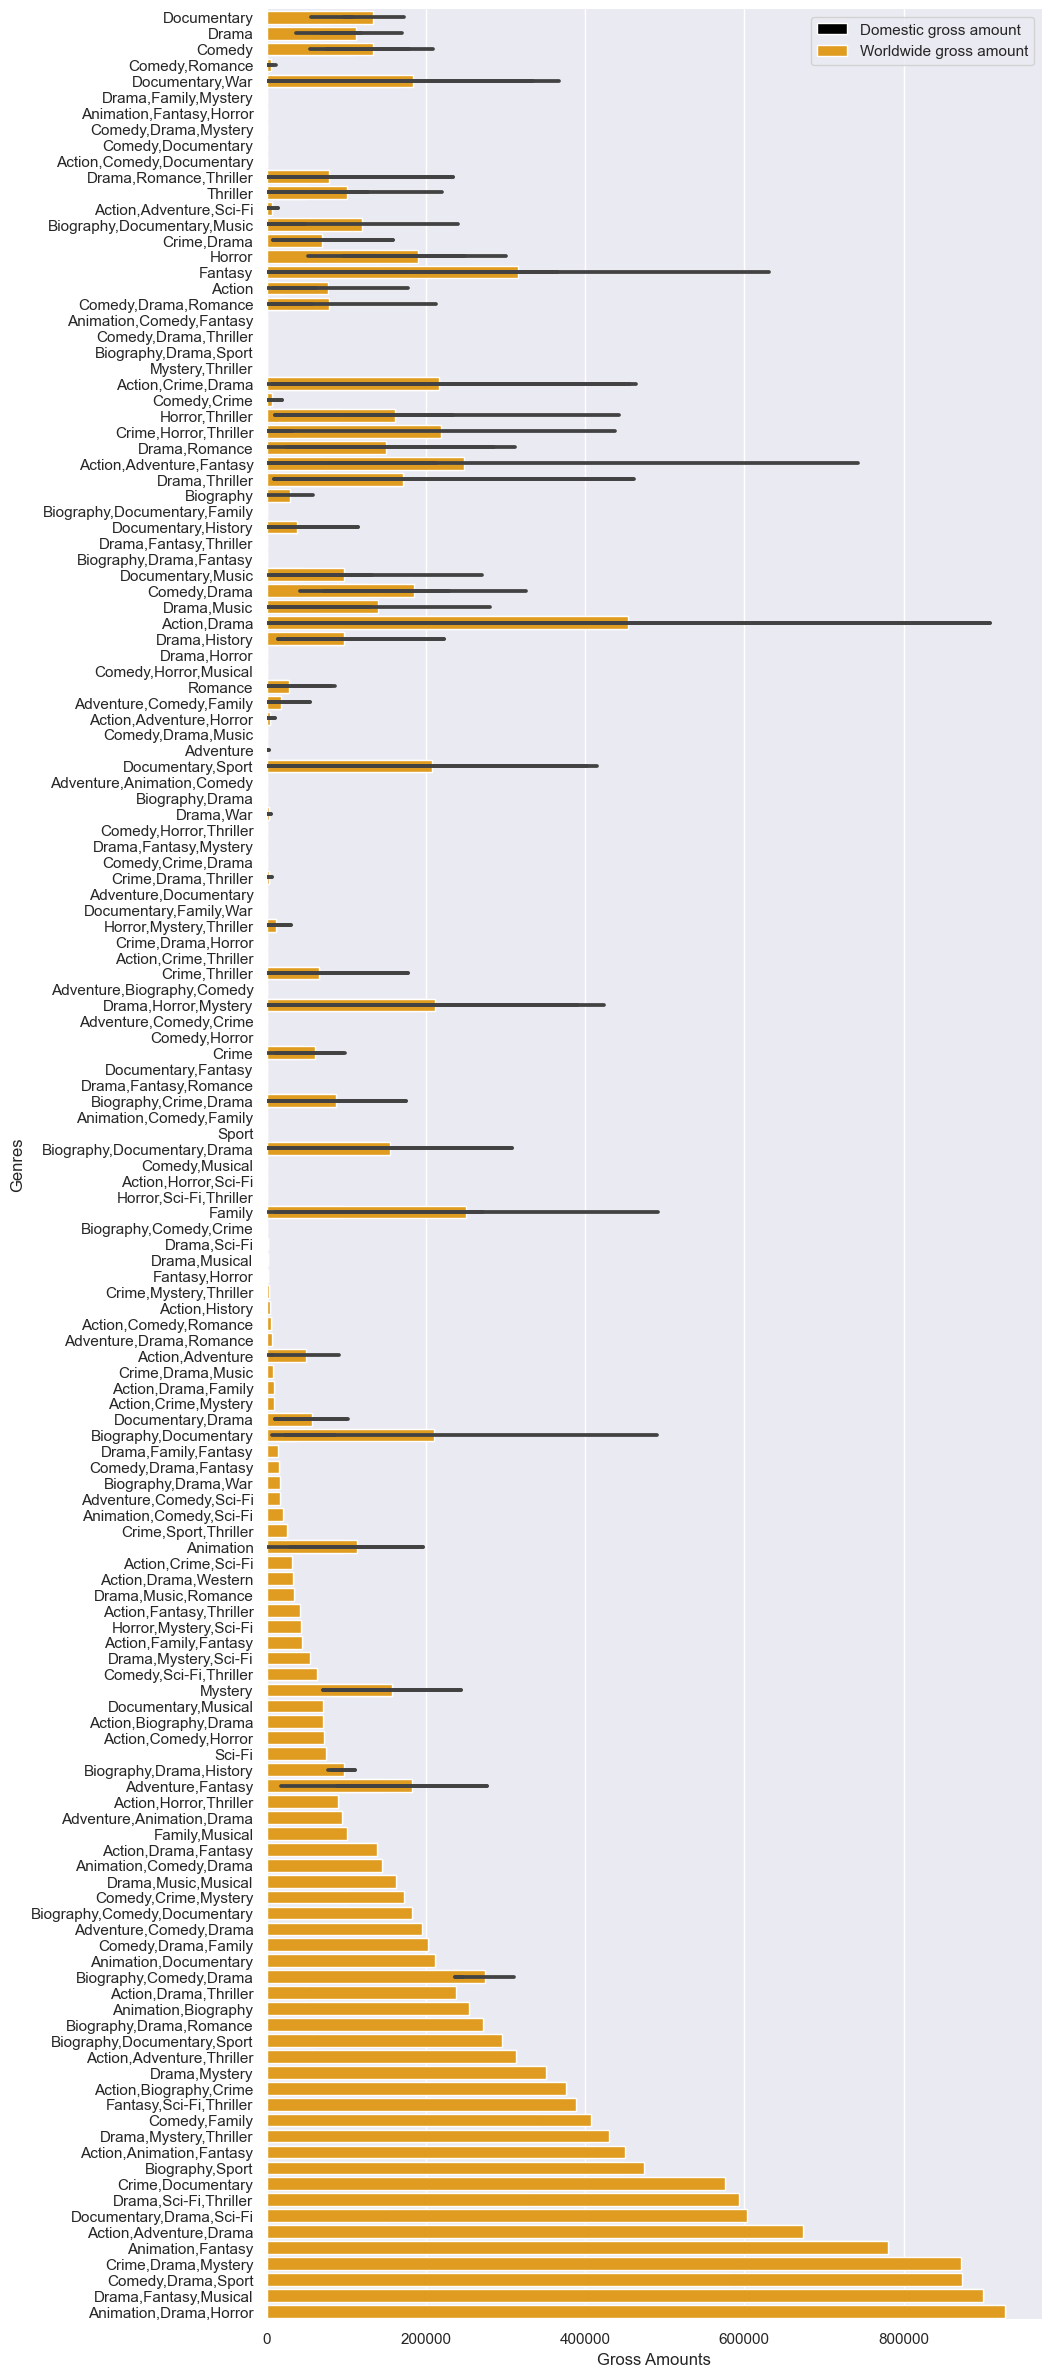

In [31]:
# Drop rows with missing values in 'domestic_gross' and 'worldwide_gross' columns
data = budget_basics_df.dropna(subset=['domestic_gross', 'worldwide_gross', 'genres'])

# Sort the genres based on 'domestic_gross' in descending order
domestic_worldwide_genres = data.sort_values("worldwide_gross", ascending=True)

# Select the top 30 genres
top_30_genres = domestic_worldwide_genres.head(500)

# Set the seaborn theme
sns.set_theme(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 30))

# Plot the domestic gross amount for the top 30 genres with a blue color
sns.barplot(x="domestic_gross", y="genres", data=top_30_genres,
            label="Domestic gross amount", color="black")

# Plot the worldwide gross amount for the top 30 genres with an orange color
sns.barplot(x="worldwide_gross", y="genres", data=top_30_genres,
            label="Worldwide gross amount", color="orange")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlabel="Gross Amounts", ylabel="Genres")
sns.despine(left=True, bottom=True)

plt.show()


Next we will combine the basics_title and ratings_title

In [32]:
ratings_basics = pd.concat([basics_title, ratings_title], axis = 1)
ratings_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,"2,013.00",175.00,"Action,Crime,Drama",tt10356526,8.30,31.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,"2,019.00",114.00,"Biography,Drama",tt10384606,8.90,559.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,"2,018.00",122.00,Drama,tt1042974,6.40,20.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,"2,017.00",80.00,"Comedy,Drama,Fantasy",tt1060240,6.50,21.00
5,tt0111414,A Thin Life,A Thin Life,"2,018.00",75.00,Comedy,tt1069246,6.20,326.00
...,...,...,...,...,...,...,...,...,...
73814,NaN,NaN,NaN,NaN,NaN,NaN,tt9165332,7.40,710.00
73817,NaN,NaN,NaN,NaN,NaN,NaN,tt9185542,6.70,78.00
73832,NaN,NaN,NaN,NaN,NaN,NaN,tt9575726,7.70,161.00
73833,NaN,NaN,NaN,NaN,NaN,NaN,tt9576110,6.80,65.00


# 3.5. Relationship between best rating and genre

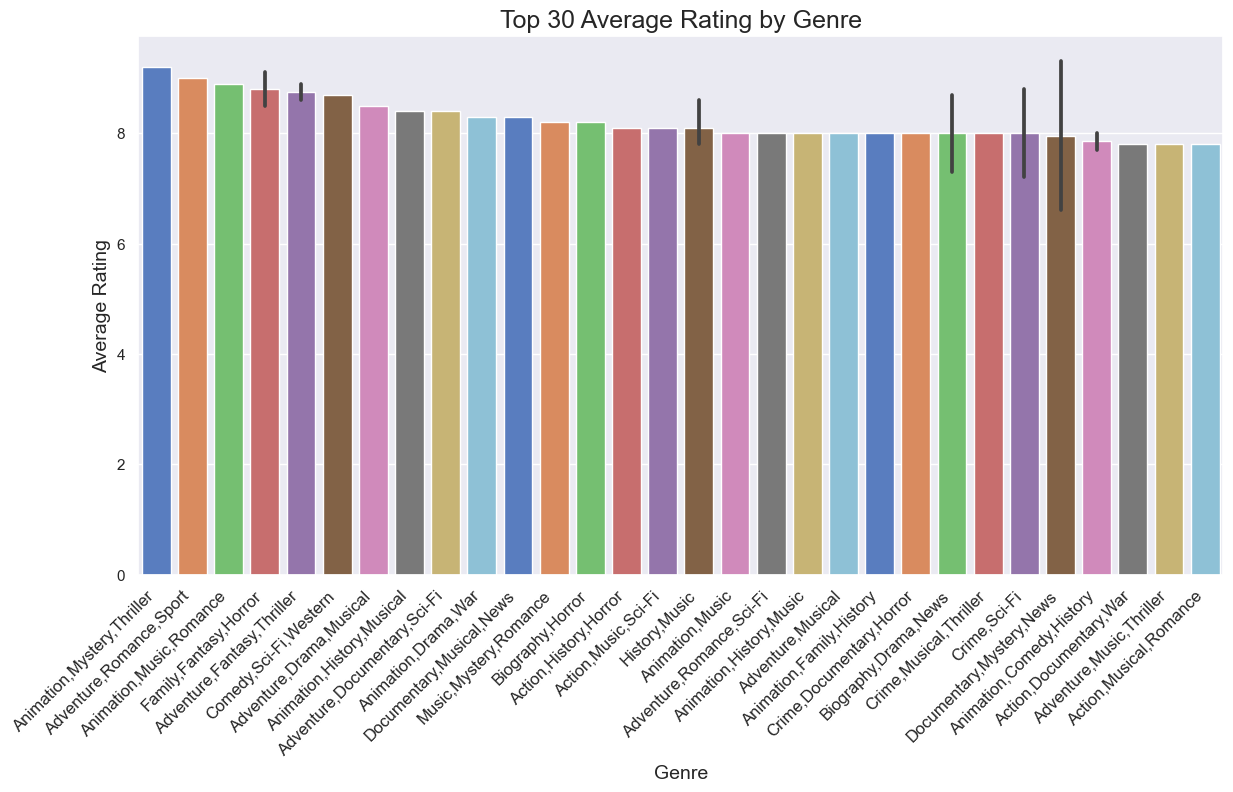

In [33]:
# Drop rows with missing values in the 'averagerating' column
data = ratings_basics.dropna(subset=['averagerating'])

fig, ax = plt.subplots(figsize=(14, 7))
order_by = data.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(30).index

sns.barplot(data=data, x='genres', y='averagerating', palette='muted', order=order_by, ax=ax)

ax.set_title('Top 30 Average Rating by Genre', fontsize=18)
ax.set_ylabel('Average Rating', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()


# 3.6. Relationship between release date and genre

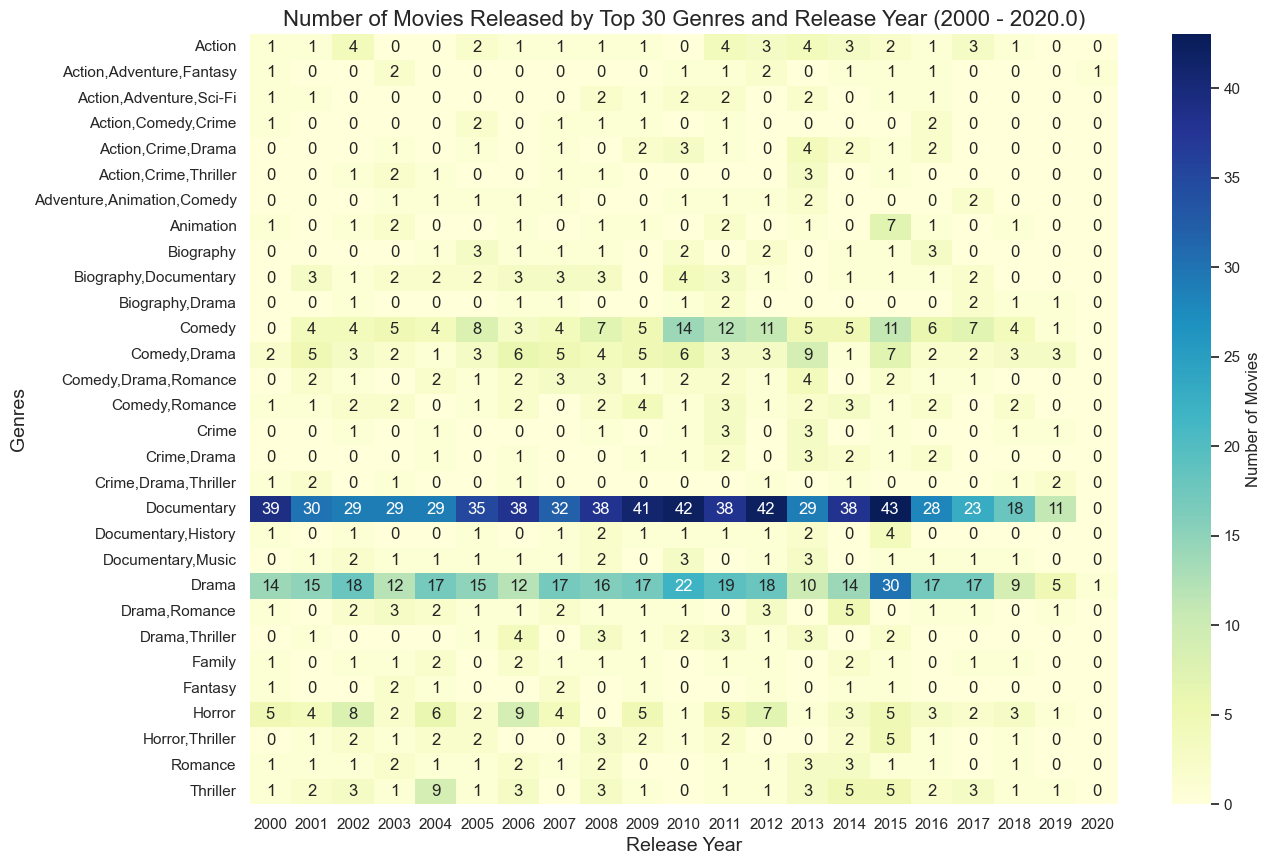

In [40]:
data = budget_basics_df

df = pd.DataFrame(data)

# Convert 'release_date' column to datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])

# Filter the data to include movies released between 2000 and the latest year
latest_year = df['release_date'].dt.year.max()
df = df[df['release_date'].dt.year.between(2000, latest_year)]

# Extract the release year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Count the number of movies for each genre in each release year
genre_counts = df.groupby(['genres', 'release_year']).size().reset_index(name='count')

# Calculate the total number of movies for each genre across all years
total_genre_counts = genre_counts.groupby('genres')['count'].sum().reset_index(name='total_count')

# Select the top 30 genres based on the highest total number of movies
top_30_genres = total_genre_counts.nlargest(30, 'total_count')['genres']

# Filter the data to include only the top 30 genres
df_top_30 = df[df['genres'].isin(top_30_genres)]

# Pivot the data to create a genre vs. release year matrix
pivot_genre_counts = df_top_30.pivot_table(index='genres', columns='release_year', aggfunc='size', fill_value=0)

# Set the seaborn theme
sns.set_theme(style="whitegrid")

# Plot the bar plot
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_genre_counts, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Number of Movies'})
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.title('Number of Movies Released by Top 30 Genres and Release Year (2000 - {})'.format(latest_year), fontsize=16)
plt.show()

# 4. Evaluation

The insights gained from the visualizations are as follows:
1. For any movie under production, it is recommended to have an average production budget of approximately $31.588 million.
2. High production budgets have a positive impact on the return on investment, both in terms of domestic gross and worldwide gross amounts.
3. Genres like drama, romance, comedy, and horror show a combination of high production budgets and high ratings.
4. Interestingly, there haven't been any movie releases in the mentioned genres, making them a promising niche for production.
5. The genres with the highest ratings include animation, drama, romance, adventure, comedy, sci-fi, and horror.

# 5. Recommendation

The following are the recommendations to Microsoft based on the evaluation above:

1. Microsoft should allocate a budget of at least $31.588 million to cover production costs, which includes operational expenses. By doing so, the studio can increase the likelihood of achieving high returns on investment both domestically and worldwide.

2. Microsoft should consider investing in genres such as drama, romance, animation, and adventure. These genres have received favorable ratings, providing the studio with better opportunities for effective marketing and audience engagement.

3. As a startup movie studio, Microsoft should focus on genres that have relatively fewer movie productions. This approach can help the studio stand out and carve a niche in the market, leading to potential success and recognition.

4. In order to maximize profits, Microsoft should not limit its focus to the domestic market alone. Expanding into the international market can result in more substantial returns and global recognition for their movies.

# 6. Following Steps

After determining the initial genre direction for movie production as a starting point, additional research should be conducted to identify the most suitable crew that can enhance the movie's chances of success.
Furthermore, it is essential to conduct further research to identify the optimal timing for movie releases throughout the year. This investigation will help determine the most favorable timeframes that can maximize the movie's impact and potential audience reach.